In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
mnist=datasets.mnist
(x_train,t_train),(x_test,t_test)=mnist.load_data()

x_train=(x_train.reshape(-1,784)/255).astype(np.float32)
x_test=(x_test.reshape(-1,784)/255).astype(np.float32)

x_train,x_val,t_train,t_val=train_test_split(x_train,t_train,test_size=0.2)

In [13]:
model=Sequential()
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [14]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
es=EarlyStopping(monitor='val_loss',patience=5,verbose=1)
hist=model.fit(x_train,t_train,epochs=1000,batch_size=128,verbose=2,validation_data=(x_val,t_val),callbacks=[es])

Train on 48000 samples, validate on 12000 samples
Epoch 1/1000
48000/48000 - 1s - loss: 2.1623 - accuracy: 0.2142 - val_loss: 1.6765 - val_accuracy: 0.6729
Epoch 2/1000
48000/48000 - 0s - loss: 1.5762 - accuracy: 0.4712 - val_loss: 0.8818 - val_accuracy: 0.7868
Epoch 3/1000
48000/48000 - 0s - loss: 1.1234 - accuracy: 0.6236 - val_loss: 0.5999 - val_accuracy: 0.8477
Epoch 4/1000
48000/48000 - 0s - loss: 0.9049 - accuracy: 0.7031 - val_loss: 0.4762 - val_accuracy: 0.8728
Epoch 5/1000
48000/48000 - 0s - loss: 0.7768 - accuracy: 0.7529 - val_loss: 0.4167 - val_accuracy: 0.8855
Epoch 6/1000
48000/48000 - 0s - loss: 0.6838 - accuracy: 0.7867 - val_loss: 0.3699 - val_accuracy: 0.8963
Epoch 7/1000
48000/48000 - 0s - loss: 0.6236 - accuracy: 0.8093 - val_loss: 0.3414 - val_accuracy: 0.9037
Epoch 8/1000
48000/48000 - 0s - loss: 0.5792 - accuracy: 0.8261 - val_loss: 0.3237 - val_accuracy: 0.9078
Epoch 9/1000
48000/48000 - 0s - loss: 0.5457 - accuracy: 0.8378 - val_loss: 0.3014 - val_accuracy: 0.9

Epoch 78/1000
48000/48000 - 0s - loss: 0.1649 - accuracy: 0.9533 - val_loss: 0.1140 - val_accuracy: 0.9682
Epoch 79/1000
48000/48000 - 0s - loss: 0.1632 - accuracy: 0.9532 - val_loss: 0.1108 - val_accuracy: 0.9689
Epoch 80/1000
48000/48000 - 0s - loss: 0.1636 - accuracy: 0.9525 - val_loss: 0.1111 - val_accuracy: 0.9688
Epoch 81/1000
48000/48000 - 0s - loss: 0.1592 - accuracy: 0.9536 - val_loss: 0.1108 - val_accuracy: 0.9695
Epoch 82/1000
48000/48000 - 0s - loss: 0.1625 - accuracy: 0.9529 - val_loss: 0.1115 - val_accuracy: 0.9691
Epoch 83/1000
48000/48000 - 0s - loss: 0.1585 - accuracy: 0.9545 - val_loss: 0.1104 - val_accuracy: 0.9697
Epoch 84/1000
48000/48000 - 0s - loss: 0.1607 - accuracy: 0.9545 - val_loss: 0.1094 - val_accuracy: 0.9700
Epoch 85/1000
48000/48000 - 0s - loss: 0.1590 - accuracy: 0.9543 - val_loss: 0.1086 - val_accuracy: 0.9703
Epoch 86/1000
48000/48000 - 0s - loss: 0.1582 - accuracy: 0.9547 - val_loss: 0.1077 - val_accuracy: 0.9707
Epoch 87/1000
48000/48000 - 0s - loss

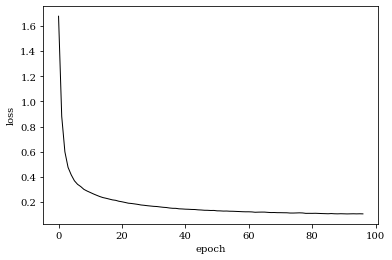

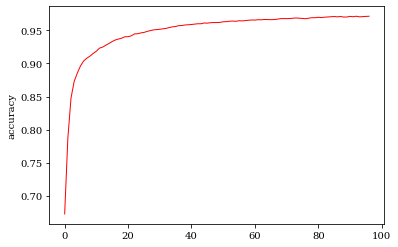

In [15]:
val_loss=hist.history['val_loss']
val_acc=hist.history['val_accuracy']
plt.figure()
plt.rc('font',family='serif')
plt.plot(range(len(val_loss)),val_loss,color='black',linewidth=1)

plt.xlabel('epoch')
plt.ylabel('loss')
# plt.savefig('output.jpg')
plt.show()
plt.ylabel('accuracy')
plt.plot(range(len(val_acc)),val_acc,color='red',linewidth=1)

<Figure size 432x288 with 0 Axes>

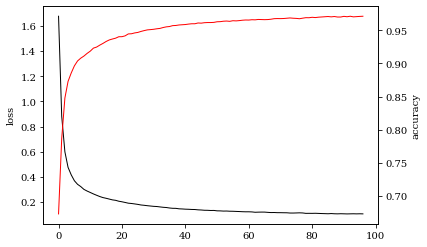

In [16]:
val_loss=hist.history['val_loss']
val_acc=hist.history['val_accuracy']

fig=plt.figure()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() # 二つ目の軸を定義

ax1.set_ylabel('loss') # ラベルを設定
ax2.set_ylabel('accuracy') 
#ax2.set_ylim(0,1)

plt.rc('font',family='serif')
ax1.plot(range(len(val_loss)),val_loss,color='black',linewidth=1)
ax2.plot(range(len(val_acc)),val_acc,color='red',linewidth=1)
plt.xlabel('epoch')
# plt.savefig('output.jpg')
plt.show()

In [17]:
loss,acc=model.evaluate(x_test,t_test,verbose=0)
print('test_loss: {:.3f}, test_acc: {:.3f}'.format(loss,acc))

test_loss: 0.100, test_acc: 0.971
